<a href="https://colab.research.google.com/github/Aryankumar102907/Aryankumar102907/blob/main/2_Neuron_Neural_Network_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

digit_recognizer_path = kagglehub.competition_download('digit-recognizer')

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [ ]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [ ]:
Y_train

array([2, 0, 6, ..., 0, 2, 6])

In [ ]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

In [ ]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 50 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [ ]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.2, 550)

Iteration:  0
[1 7 5 ... 2 1 5] [2 0 6 ... 0 2 6]
0.08958536585365853
Iteration:  50
[2 0 5 ... 0 6 6] [2 0 6 ... 0 2 6]
0.6851951219512196
Iteration:  100
[2 0 5 ... 0 6 6] [2 0 6 ... 0 2 6]
0.788609756097561
Iteration:  150
[2 0 5 ... 0 6 6] [2 0 6 ... 0 2 6]
0.8186341463414634
Iteration:  200
[2 0 6 ... 0 6 6] [2 0 6 ... 0 2 6]
0.8376097560975609
Iteration:  250
[2 0 6 ... 0 6 6] [2 0 6 ... 0 2 6]
0.8508780487804878
Iteration:  300
[2 0 6 ... 0 6 6] [2 0 6 ... 0 2 6]
0.8613658536585366
Iteration:  350
[2 0 6 ... 0 6 6] [2 0 6 ... 0 2 6]
0.8685853658536585
Iteration:  400
[2 0 6 ... 0 2 6] [2 0 6 ... 0 2 6]
0.8745121951219512
Iteration:  450
[2 0 6 ... 0 2 6] [2 0 6 ... 0 2 6]
0.879219512195122
Iteration:  500
[2 0 6 ... 0 2 6] [2 0 6 ... 0 2 6]
0.8836341463414634


In [ ]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

In [ ]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[9 9 4 8 6 4 1 9 9 4 9 0 5 5 0 4 7 4 3 6 2 3 1 2 7 7 5 1 8 3 8 9 2 9 4 1 5
 1 7 8 7 6 5 8 6 0 9 8 2 9 8 4 5 2 1 8 3 7 9 6 8 3 0 5 9 2 7 5 3 1 3 2 1 5
 5 5 8 7 7 1 3 9 4 7 9 7 8 3 0 1 9 0 0 3 2 2 6 5 3 1 7 6 2 5 3 4 9 8 7 1 4
 0 8 0 1 2 8 3 3 3 0 0 3 7 1 6 1 1 7 6 3 1 5 6 0 8 8 4 7 3 9 5 0 3 0 8 5 8
 6 7 5 0 2 3 9 9 7 7 2 3 6 5 2 8 1 6 7 5 8 1 7 3 7 4 2 9 5 8 6 4 1 6 1 3 7
 0 3 7 4 5 0 1 4 0 2 9 9 8 4 6 8 9 0 1 7 6 6 5 9 5 6 6 9 1 4 6 4 6 8 7 9 3
 9 1 9 3 5 0 6 0 8 1 6 6 3 8 7 6 6 4 6 3 3 7 7 0 7 9 1 8 8 8 8 0 4 0 9 8 1
 6 8 2 0 3 3 6 6 7 6 7 5 0 5 0 6 4 2 7 5 5 9 9 3 6 0 6 5 0 2 3 7 4 2 8 6 8
 1 4 1 5 4 2 5 4 3 8 8 0 3 8 0 1 0 8 6 7 9 4 8 5 5 5 2 0 2 4 7 0 1 8 7 5 5
 3 0 1 0 6 5 8 7 7 9 8 8 4 8 6 1 4 8 0 9 2 4 6 4 3 8 7 8 9 2 5 9 2 6 5 2 3
 1 0 8 3 7 7 3 8 6 8 1 6 6 1 6 7 3 3 1 5 2 8 6 7 2 4 6 4 3 1 7 6 3 9 9 6 9
 1 9 8 0 4 5 3 5 9 5 8 5 6 7 5 4 1 3 1 2 8 4 6 7 0 5 4 1 2 2 8 6 8 0 5 3 0
 4 5 8 9 8 1 8 8 9 7 3 4 6 6 8 4 2 0 9 3 1 8 6 8 0 9 1 7 7 8 6 0 0 0 2 3 0
 1 0 6 2 6 6 8 9 3 1 0 7 

0.865

Prediction:  [2]
Label:  2


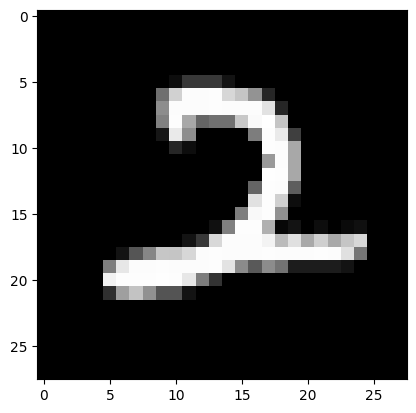

Prediction:  [0]
Label:  0


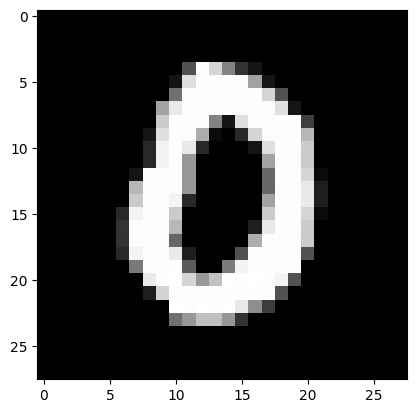

Prediction:  [6]
Label:  6


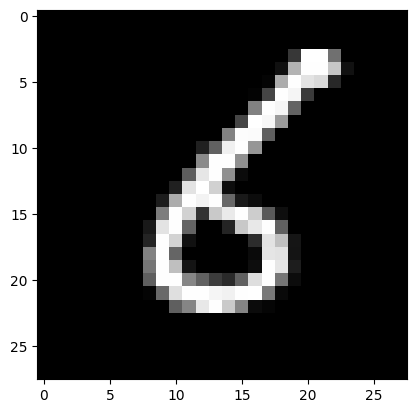

Prediction:  [7]
Label:  7


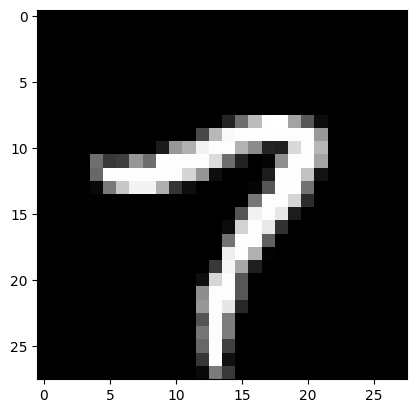

In [ ]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

Prediction:  [7]
Label:  7


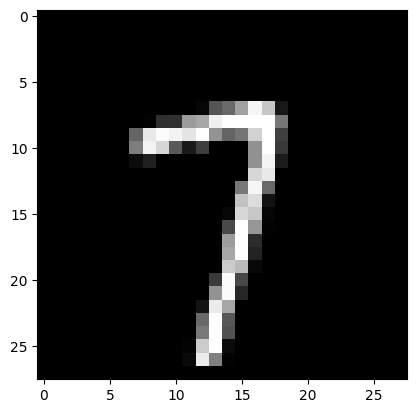

In [ ]:
test_prediction(109, W1, b1, W2, b2)